# Influenza model

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import model
import pickle
import itertools
import networkx as nx
from tqdm import tqdm, tqdm_notebook
%matplotlib inline

### Prepare data

In [2]:
prep_data = model.data_and_network_prep()

# Load prep data
# with open('../../Data/vaccination_model/prep_data.pickle', 'rb') as pickle_in:
#     prep_data = pickle.load(pickle_in)

In [3]:
# prep_data = model.data_and_network_prep(network_path='../../Data/network/static_network_with_age_200K.gpickle')

### Data for fit

In [4]:
# Create data for the fit
data_for_fit = model.create_data_for_fit_influenza()

### Load Grid Seasrch Results

In [5]:
# # 2017
# with open('L:/Dor/Data/influenza_model/results/grid_search_2017_1_res.pickle', 'rb') as pickle_in:
#     grid_search_res1 = pickle.load(pickle_in)
    
# with open('L:/Dor/Data/influenza_model/results/grid_search_2017_2_res.pickle', 'rb') as pickle_in:
#     grid_search_res2 = pickle.load(pickle_in)
    
# with open('L:/Dor/Data/influenza_model/results/grid_search_2017_3_res.pickle', 'rb') as pickle_in:
#     grid_search_res3 = pickle.load(pickle_in)
    
# grid_search_res = grid_search_res1 + grid_search_res2 + grid_search_res3

In [6]:
# 2016
with open('L:/Dor/Data/influenza_model/results/grid_search_2016_1_res.pickle', 'rb') as pickle_in:
    grid_search_res1 = pickle.load(pickle_in)
    
with open('L:/Dor/Data/influenza_model/results/grid_search_2016_2_res.pickle', 'rb') as pickle_in:
    grid_search_res2 = pickle.load(pickle_in)

grid_search_res = grid_search_res1 #+ grid_search_res2

In [7]:
# 2016
with open('L:/Dor/Data/influenza_model/results/grid_search_2016_1_new_res.pickle', 'rb') as pickle_in:
    grid_search_res = pickle.load(pickle_in)

#### Get best parametrs according to each likelihood function

In [8]:
# Max likelihood 
liklihood = max(grid_search_res, key=lambda x: x['log_likelihood'])

# Max likelihood age
liklihood_age = max(grid_search_res, key=lambda x: x['log_likelihood_age'])

# Max likelihood subdist
liklihood_subdist = max(grid_search_res, key=lambda x: x['log_likelihood_subdist'])


print(f"Max likelihood: {int(liklihood_age['log_likelihood']):,d}")
print(liklihood)
print('\n')

print(f"Max likelihood by age: {int(liklihood_age['log_likelihood_age']):,d}")
print(liklihood_age)
print('\n')

print(f"Max likelihood by subdist: {int(liklihood_subdist['log_likelihood_subdist']):,d}")
print(liklihood_subdist)
print('\n')

Max likelihood: -6,139
{'parameters': {2016: {'beta': 0.0015172649054787906, 'delta': 1, 'phi': -3.7226934580923317, 'epsilon': 1}}, 'log_likelihood': -5861.419218446221, 'log_likelihood_age': 28211.623864536934, 'log_likelihood_subdist': 14254.221664309898}


Max likelihood by age: 28,281
{'parameters': {2016: {'beta': 0.0015448276398101898, 'delta': 1, 'phi': -3.724241584382226, 'epsilon': 1}}, 'log_likelihood': -6139.711575619711, 'log_likelihood_age': 28281.29512928202, 'log_likelihood_subdist': 14697.936607799087}


Max likelihood by subdist: 14,697
{'parameters': {2016: {'beta': 0.0015448276398101898, 'delta': 1, 'phi': -3.724241584382226, 'epsilon': 1}}, 'log_likelihood': -6139.711575619711, 'log_likelihood_age': 28281.29512928202, 'log_likelihood_subdist': 14697.936607799087}




### Run model

In [9]:
season = 2016

In [10]:
# parametes = liklihood['parameters']
# parameters = liklihood_age['parameters']
parameters = liklihood_subdist['parameters']

#### Single realization

In [11]:
# model_results = [model.run_influenza_model(parameters, prep_data, season=s) for s in model.seasons]
# model_results = model.run_influenza_model(parameters, prep_data, season=season)

In [12]:
# print(f'log-likelihood by clinic and age: {int(model.log_likelihood_influenza(model_results["lambdas"],\
#         data_for_fit["by_clinic_age"], season)):,d}')

# print(f'log-likelihood by subdist and age: {int(model.log_likelihood_agg_by_subdist_influenza(model_results["lambdas"],\
#         data_for_fit["by_subdist"], season, prep_data)):,d}')

# print(f'log-likelihood by age: {int(model.log_likelihood_agg_age_influenza(model_results, data_for_fit, season)):,d}')

In [13]:
# model.plot_aggregated_fit_influenza(model_results, data_for_fit, season)
# model.plot_aggregated_fit_influenza(model_results, data_for_fit, season, age=0)
# model.plot_aggregated_fit_influenza(model_results, data_for_fit, season, age=1)

In [14]:
# model.plot_infection_rate_by_age_influenza(model_results, data_for_fit, prep_data, season)

# model.plot_fit_by_subdist_influenza(model_results, data_for_fit['by_subdist'], prep_data, season)

# model.plot_infection_rate_influenza(model_results, prep_data, season=season)

#### Median realization

In [15]:
# parametes = liklihood['parameters']
# parameters = liklihood_age['parameters']
parameters = liklihood_subdist['parameters']

# Run the model x times
model_results_list = [model.run_influenza_model(parameters, prep_data, season=season) for i in range(15)]

In [16]:
# Calculate likelihood
model_res_likelihood_list = [model.log_likelihood_agg_by_subdist_influenza(res['lambdas'], data_for_fit['by_subdist'],
                                                                     season, prep_data) for res in model_results_list]

# Get median realization
med = np.argsort(np.array(model_res_likelihood_list))[len(model_res_likelihood_list)//2]
median_model_results = model_results_list[med]

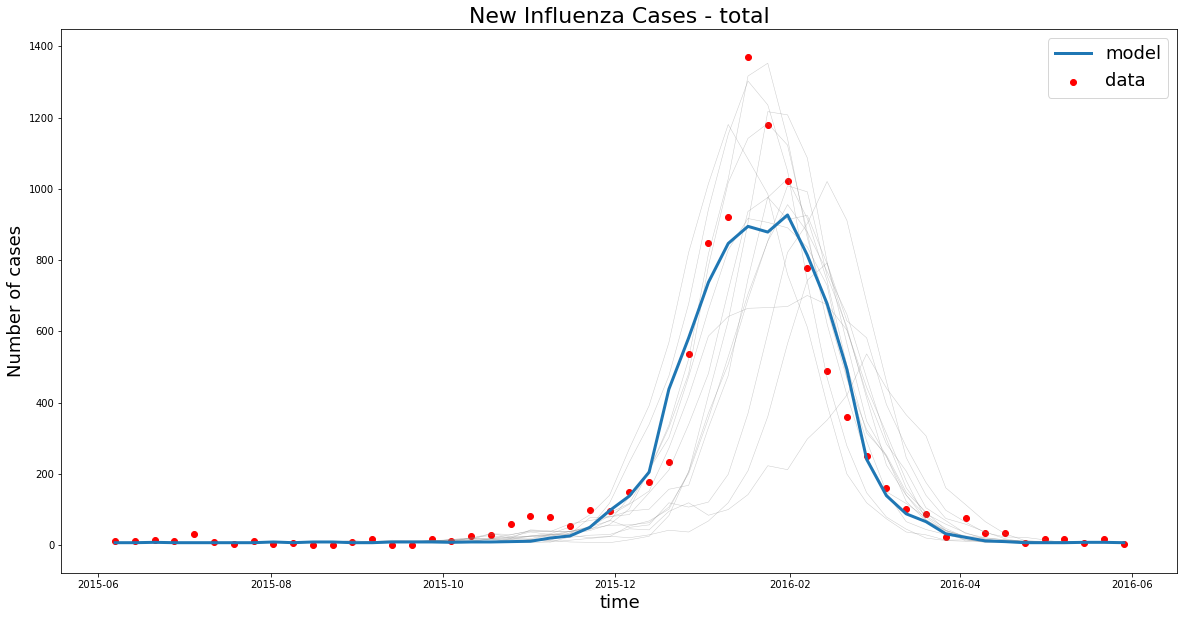

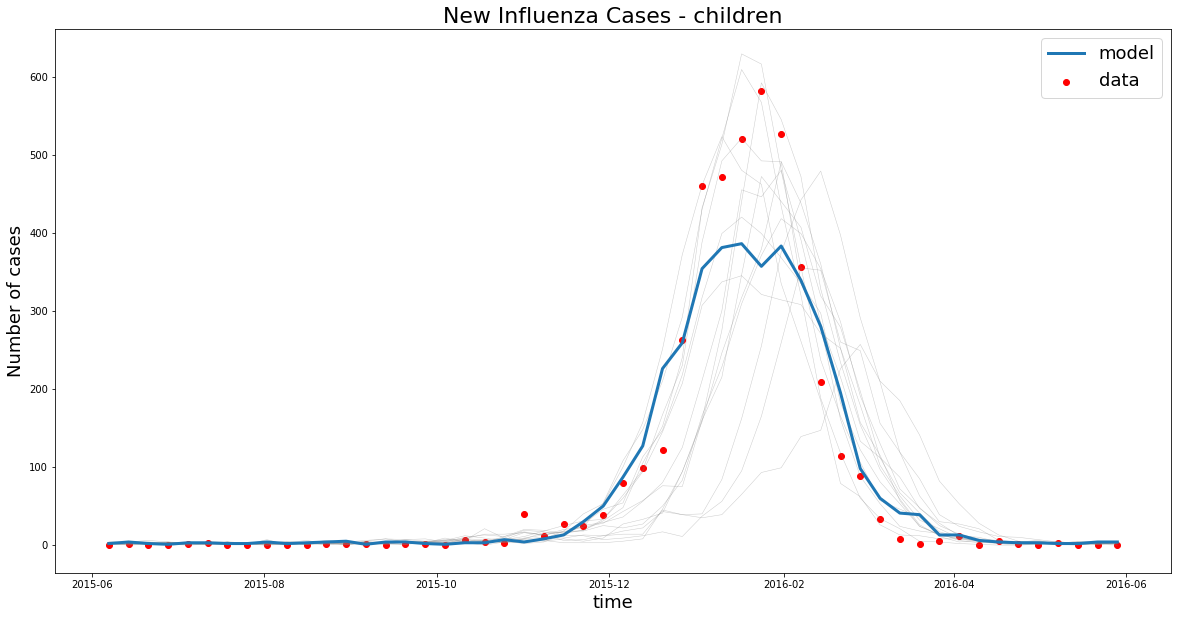

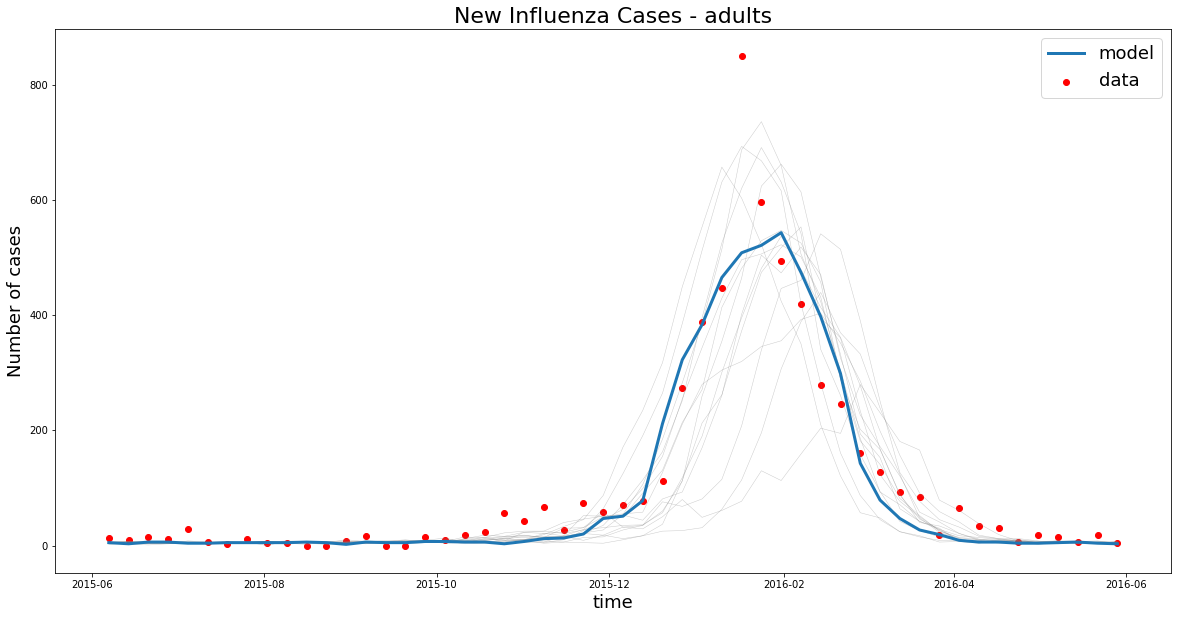

In [17]:
model.plot_aggregated_fit_with_cloud_influenza(model_results_list, data_for_fit, season, prep_data, likelihood_by='subdist')
model.plot_aggregated_fit_with_cloud_influenza(model_results_list, data_for_fit, season, prep_data, likelihood_by='subdist', age=0)
model.plot_aggregated_fit_with_cloud_influenza(model_results_list, data_for_fit, season, prep_data, likelihood_by='subdist', age=1)

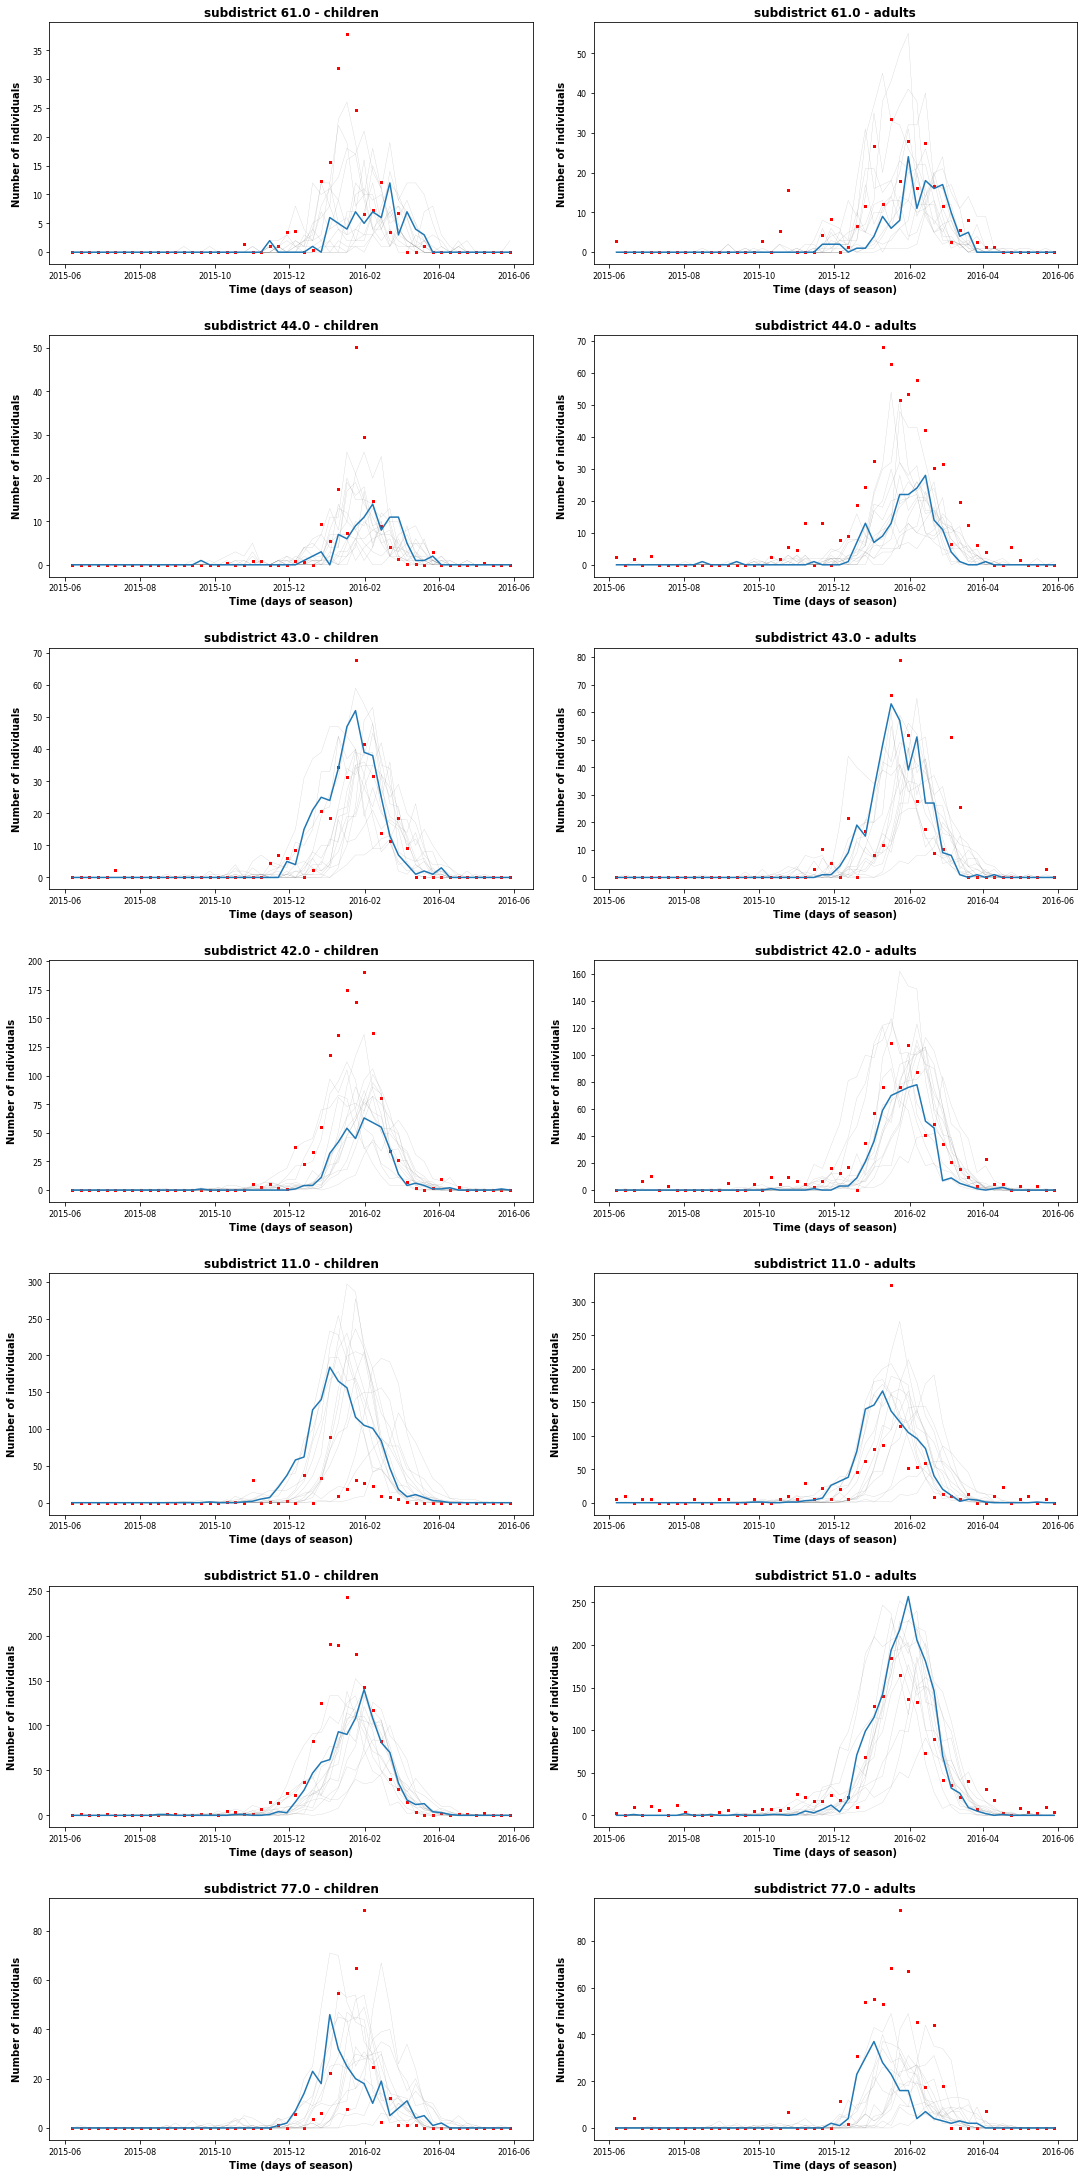

In [18]:
model.plot_fit_by_subdist_with_cloud_influenza(model_results_list, data_for_fit, season, prep_data, likelihood_by='subdist')
model_results_list = []

In [19]:
print(f'log-likelihood by clinic and age: {int(model.log_likelihood_influenza(median_model_results["lambdas"],\
        data_for_fit["by_clinic_age"], season)):,d}')

print(f'log-likelihood by subdist and age: {int(model.log_likelihood_agg_by_subdist_influenza(median_model_results["lambdas"],\
        data_for_fit["by_subdist"], season, prep_data)):,d}')

print(f'log-likelihood by age: {int(model.log_likelihood_agg_age_influenza(median_model_results, data_for_fit, season)):,d}')

log-likelihood by clinic and age: -5,876
log-likelihood by subdist and age: 22,933
log-likelihood by age: 42,804


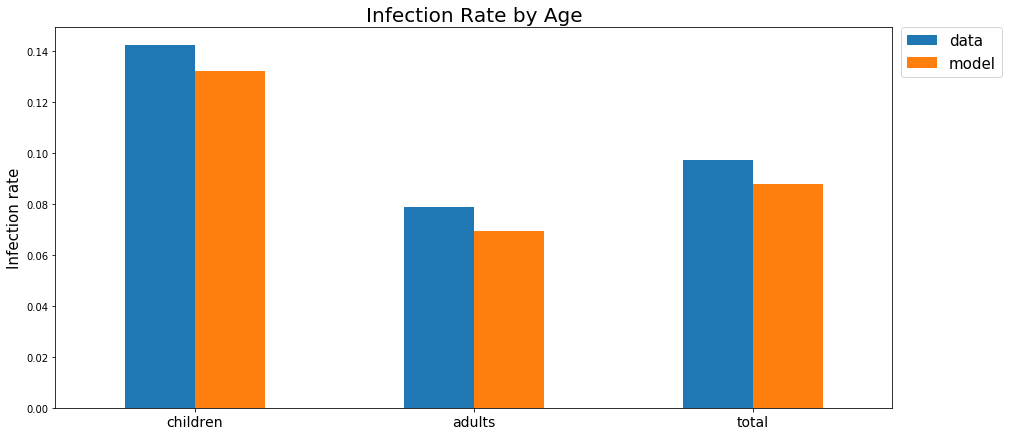

In [20]:
model.plot_infection_rate_by_age_influenza(median_model_results, data_for_fit, prep_data, season)

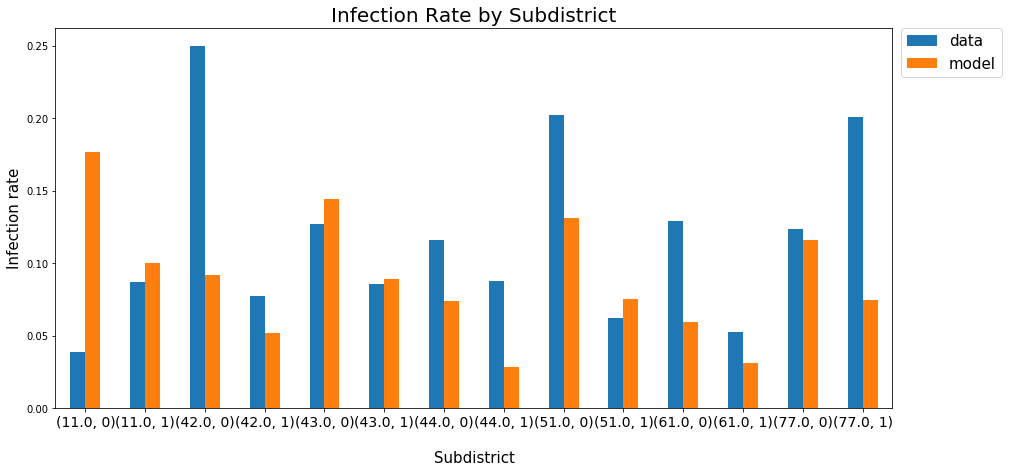

In [21]:
model.plot_infection_rate_influenza(median_model_results, prep_data, season=season)

## Homogenous

#### Get grid search parameters

In [22]:
# 2016
with open('L:/Dor/Data/influenza_model/results/homo_grid_search_2016_1_res.pickle', 'rb') as pickle_in:
    grid_search_res_homo1 = pickle.load(pickle_in)
    
with open('L:/Dor/Data/influenza_model/results/homo_grid_search_2016_2_res.pickle', 'rb') as pickle_in:
    grid_search_res_homo2 = pickle.load(pickle_in)

grid_search_res_homo = grid_search_res_homo1 #+ grid_search_res_homo2

In [23]:
with open('L:/Dor/Data/influenza_model/results/homo_grid_search_2016_1_new_res.pickle', 'rb') as pickle_in:
    grid_search_res_homo = pickle.load(pickle_in)

grid_search_res_homo = grid_search_res_homo 

In [24]:
# Max likelihood age
liklihood_age_homo = max(grid_search_res_homo, key=lambda x: x['log_likelihood_age'])

print(f"Max likelihood by age: {int(liklihood_age_homo['log_likelihood_age']):,d}")
print(liklihood_age_homo)
print('\n')

Max likelihood by age: 27,798
{'parameters': {2016: {'beta': 6.805395391780246e-07, 'delta': 1, 'phi': -3.4062300460755113, 'epsilon': 1}}, 'log_likelihood': -157748.03368514424, 'log_likelihood_age': 27798.717737910916, 'log_likelihood_subdist': -157748.03368586712}




#### Run model

In [25]:
season = 2016

In [26]:
# parameters_homo = {season: {'beta': 0.00000067, 'delta': 1, 'phi': (-30/52)*2*np.pi, 'epsilon': 1}
#               for season in model.seasons}

#### Single realization

In [27]:
parameters_homo = liklihood_age_homo['parameters']

In [28]:
model_results_homo = model.run_influenza_model(parameters_homo, prep_data, season=season, homogenous=True)

In [29]:
print(f'log-likelihood by clinic and age: {int(model.log_likelihood_influenza(model_results_homo["lambdas"],\
        data_for_fit["by_clinic_age"], season)):,d}')

print(f'log-likelihood by subdist and age: {int(model.log_likelihood_agg_by_subdist_influenza(model_results_homo["lambdas"],\
        data_for_fit["by_subdist"], season, prep_data)):,d}')

print(f'log-likelihood by age: {int(model.log_likelihood_agg_age_influenza(model_results_homo, data_for_fit, season)):,d}')

log-likelihood by clinic and age: -15,523
log-likelihood by subdist and age: 7,853
log-likelihood by age: 40,030


In [30]:
# model.plot_aggregated_fit_influenza(model_results_homo, data_for_fit, season)
# model.plot_aggregated_fit_influenza(model_results_homo, data_for_fit, season, age=0)
# model.plot_aggregated_fit_influenza(model_results_homo, data_for_fit, season, age=1)

In [31]:
# model.plot_infection_rate_by_age_influenza(model_results_homo, data_for_fit, prep_data, season)

# model.plot_fit_by_subdist_influenza(model_results_homo, data_for_fit['by_subdist'], prep_data, season)

# model.plot_infection_rate_influenza(model_results_homo, prep_data, season=season)

#### Median realization

In [32]:
parameters_homo = liklihood_age_homo['parameters']
model_results_list_homo = [model.run_influenza_model(parameters_homo, prep_data, season=season, homogenous=True)
                           for i in range(15)]

In [33]:
# Run the model x times
model_res_likelihood_list_homo = [model.log_likelihood_agg_age_influenza(res, data_for_fit, season)
                                  for res in model_results_list_homo]

# Get median realization
med_homo = np.argsort(np.array(model_res_likelihood_list_homo))[len(model_res_likelihood_list_homo)//2]
median_model_results_homo = model_results_list_homo[med_homo]

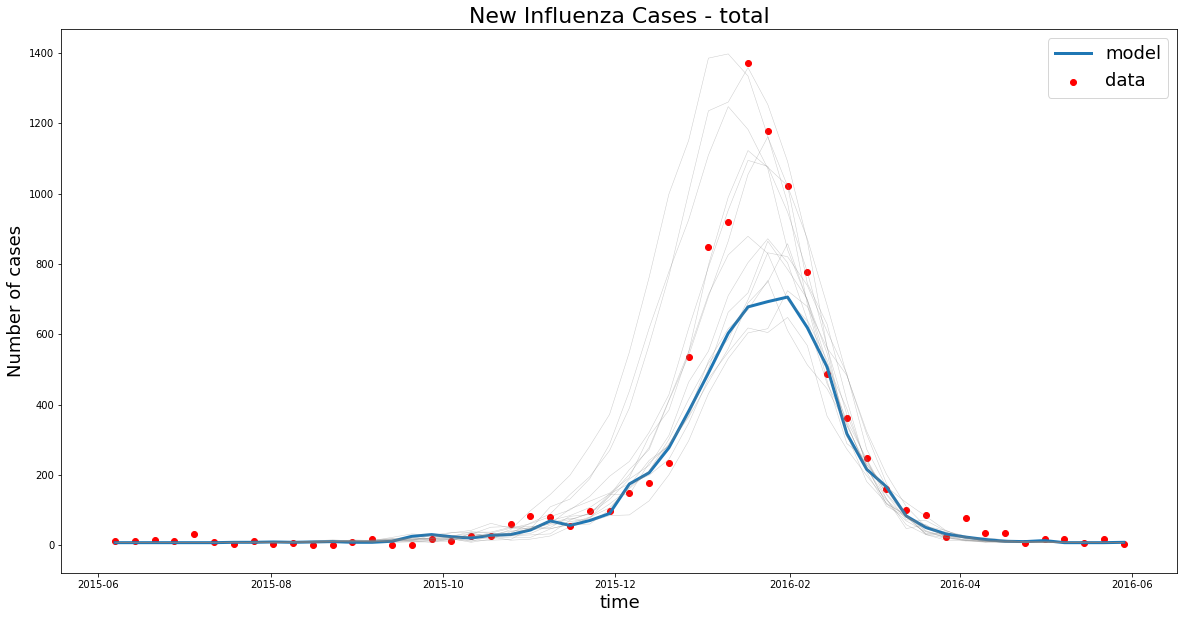

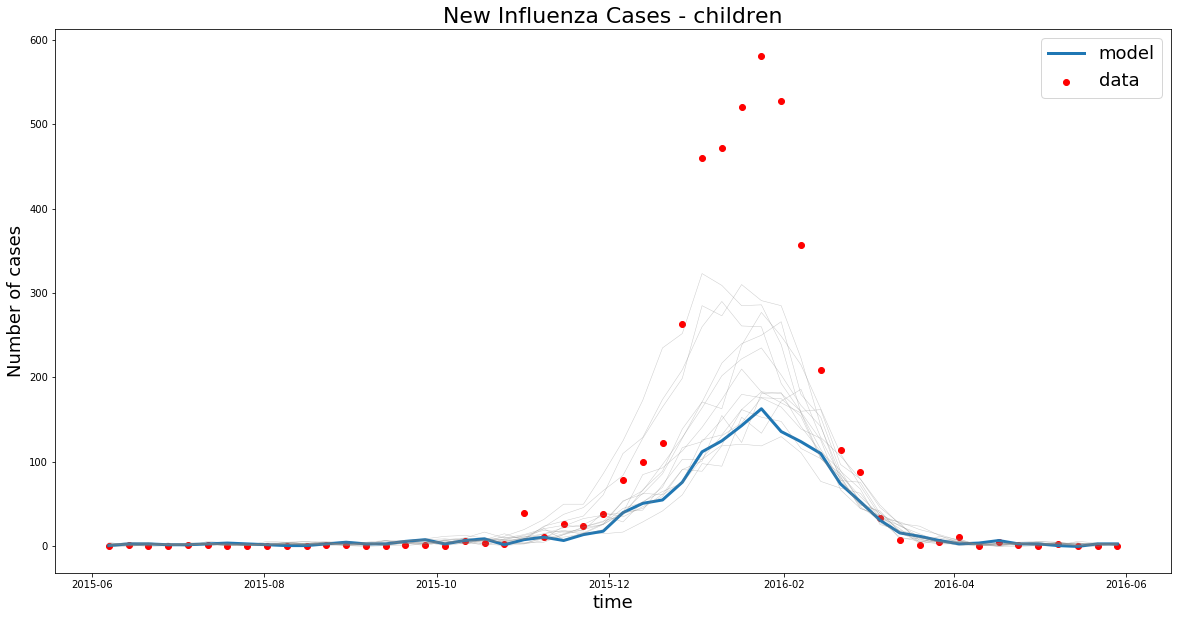

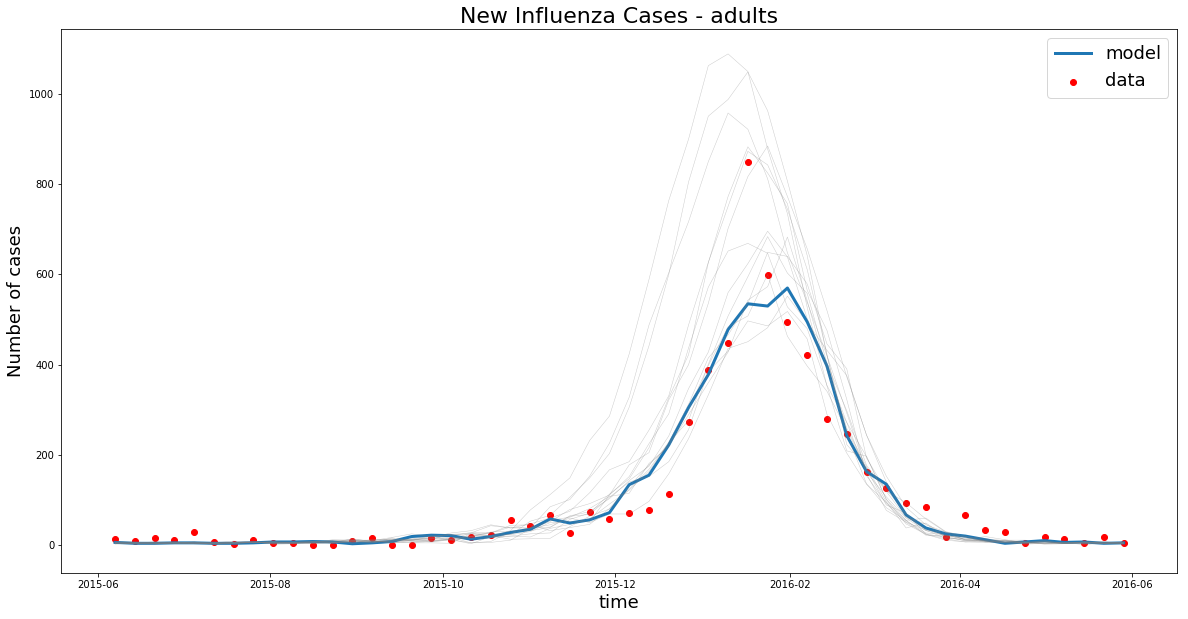

In [34]:
model.plot_aggregated_fit_with_cloud_influenza(model_results_list_homo, data_for_fit, season, prep_data, likelihood_by='age')
model.plot_aggregated_fit_with_cloud_influenza(model_results_list_homo, data_for_fit, season, prep_data, likelihood_by='age', age=0)
model.plot_aggregated_fit_with_cloud_influenza(model_results_list_homo, data_for_fit, season, prep_data, likelihood_by='age', age=1)

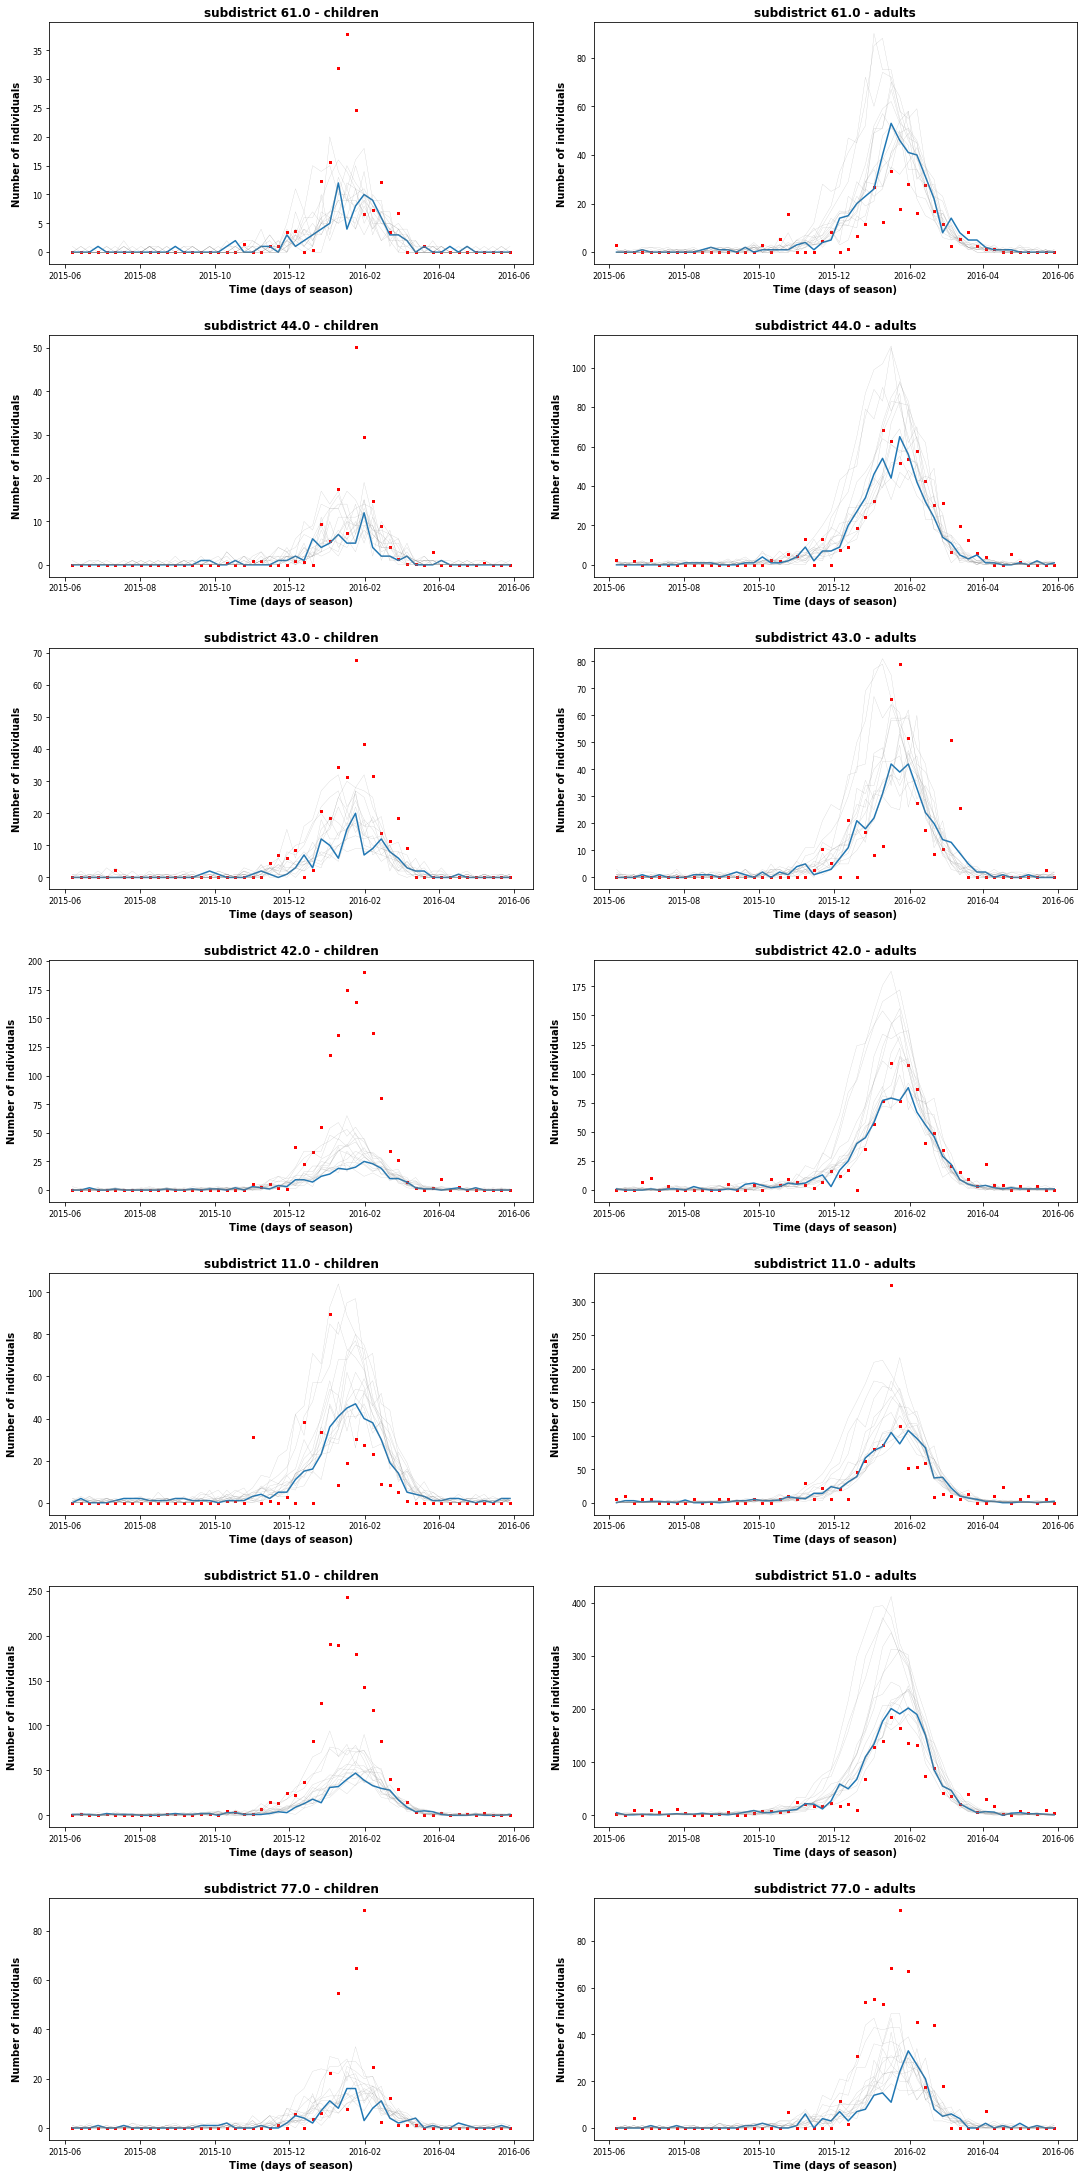

In [35]:
model.plot_fit_by_subdist_with_cloud_influenza(model_results_list_homo, data_for_fit, season, prep_data, likelihood_by='age')
model_results_list_homo = []

In [36]:
print(f'log-likelihood by clinic and age: {int(model.log_likelihood_influenza(median_model_results_homo["lambdas"],\
        data_for_fit["by_clinic_age"], season)):,d}')

print(f'log-likelihood by subdist and age: {int(model.log_likelihood_agg_by_subdist_influenza(median_model_results_homo["lambdas"],\
        data_for_fit["by_subdist"], season, prep_data)):,d}')

print(f'log-likelihood by age: {int(model.log_likelihood_agg_age_influenza(median_model_results_homo, data_for_fit, season)):,d}')

log-likelihood by clinic and age: -12,010
log-likelihood by subdist and age: 11,364
log-likelihood by age: 41,745


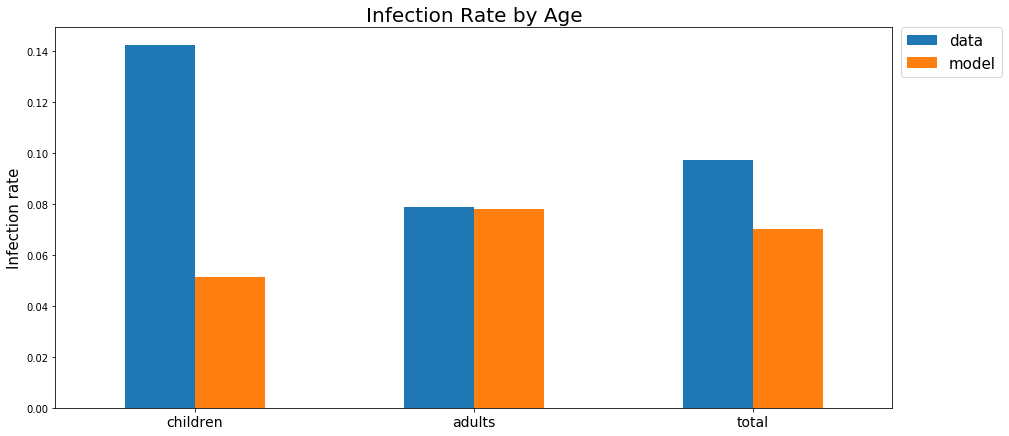

In [37]:
model.plot_infection_rate_by_age_influenza(median_model_results_homo, data_for_fit, prep_data, season)

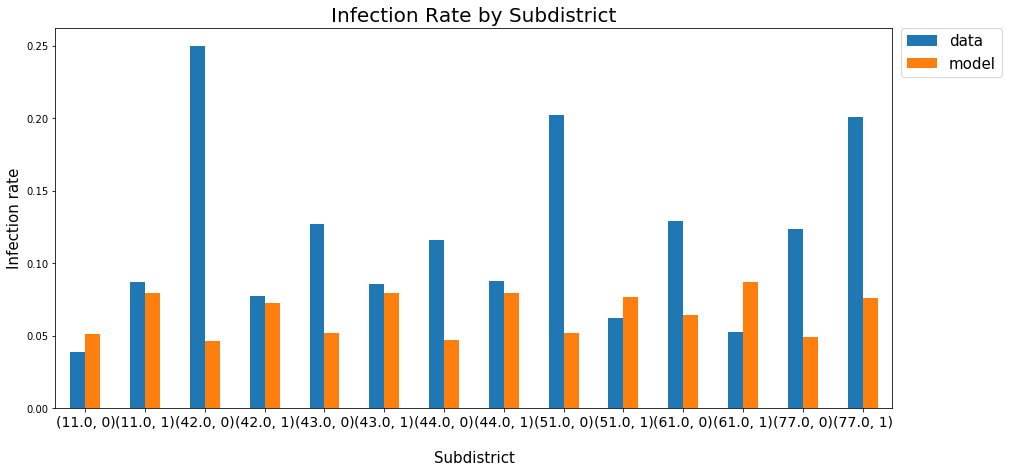

In [38]:
model.plot_infection_rate_influenza(median_model_results_homo, prep_data, season=season)

## Homogenous and network comparison

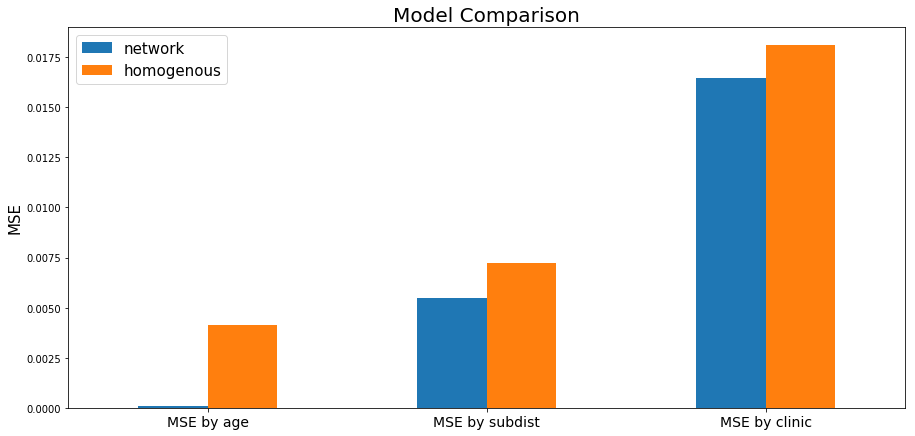

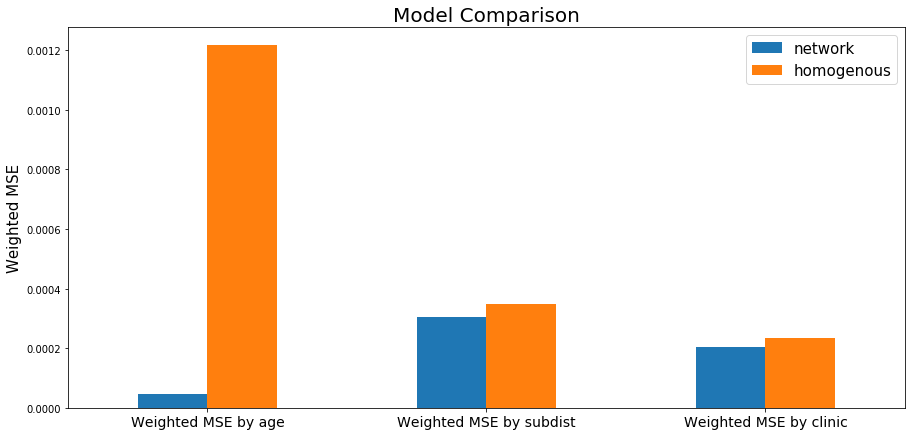

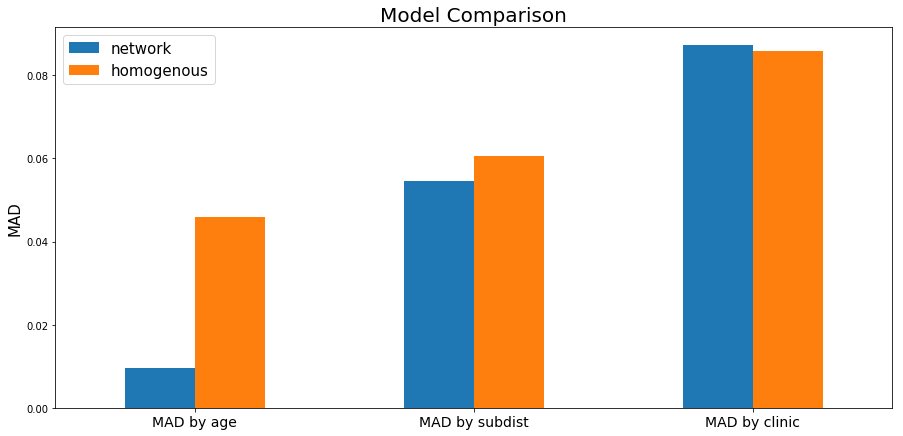

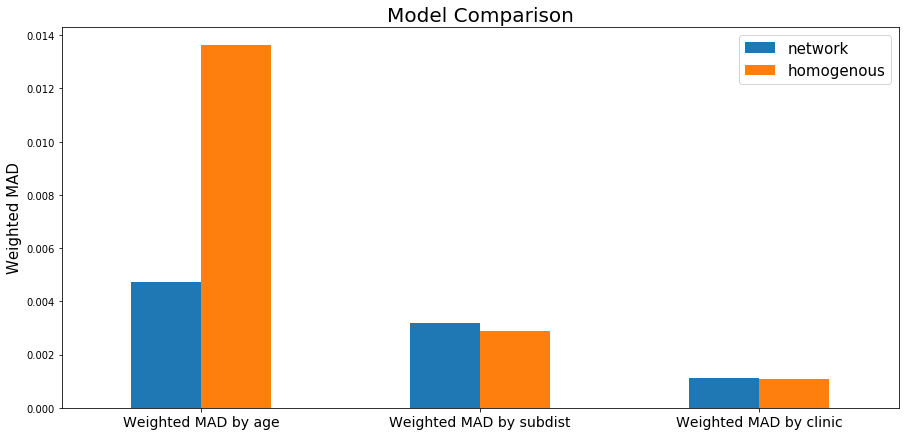

In [39]:
results = [median_model_results, median_model_results_homo]
measures = ['MSE', 'Weighted MSE', 'MAD', 'Weighted MAD']

for measure in measures:
    model.plot_model_comparison_influenza(results, data_for_fit, prep_data, season, measure)

In [40]:
errors = model.model_comparison_influenza(results, data_for_fit, prep_data, season, measures)
errors

,network,homogenous
MSE by age,0.000011,0.002691
MSE by subdist,0.004144,0.005282
MSE by clinic,0.015119,0.016562
Weighted MSE by age,0.000005,0.001009
Weighted MSE by subdist,0.000239,0.000316
Weighted MSE by clinic,0.000190,0.000213
MAD by age,0.003255,0.049123
MAD by subdist,0.047682,0.059330
MAD by clinic,0.084141,0.085461
Weighted MAD by age,0.001568,0.021135
